In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
%matplotlib inline

In [2]:
july = pd.read_csv('../data/july.csv')
july.head()

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01 00:00:33.550000,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,Lyft
1,2019-07-01 00:00:34.973000,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,Lyft
2,2019-07-01 00:00:41.183000,36.179319,-86.751538,Powered570380,Powered,76.0,scooter,0.15,Lyft
3,2019-07-01 00:00:41.620000,36.152111,-86.803821,Powered240631,Powered,43.0,scooter,0.15,Lyft
4,2019-07-01 00:00:45.087000,36.149355,-86.797550,Powered970404,Powered,52.0,scooter,0.15,Lyft


In [3]:
july.companyname.unique()

array(['Lyft', 'Bird', 'Spin', 'Bolt', 'Jump', 'Lime', 'Gotcha'],
      dtype=object)

In [4]:
company_dict = {'Lyft':0, 'Bird': 1, 'Spin': 2, 'Bolt': 3, 'Jump': 4, 'Lime': 5, 'Gotcha': 6}

In [5]:
july.companyname = july.companyname.replace(company_dict)

In [6]:
july.pubdatetime = pd.to_datetime(july.pubdatetime)
july.head(2)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,0
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,0


In [7]:
july.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [8]:
july_scooters = july.loc[july.sumdgroup.isin(['scooter', 'Scooter'])]

In [9]:
july_scooters = july_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [10]:
july_scooters.to_pickle("../data/july.pkl")

In [11]:
july_pkl = pd.read_pickle("../data/july.pkl")
july_pkl.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,0
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,33.0,0
2,2019-07-01 00:00:41.183,36.179319,-86.751538,Powered570380,76.0,0
3,2019-07-01 00:00:41.620,36.152111,-86.803821,Powered240631,43.0,0
4,2019-07-01 00:00:45.087,36.149355,-86.797550,Powered970404,52.0,0


In [12]:
july_pkl['sumdid'].value_counts().head(20)#look into these based on presentation

PoweredK7VBEW7S2VHPG                           8915
PoweredSMYDSCUCCKE3D                           8910
PoweredCPBMGOVZOHE4Z                           8909
Powered023b94ca-01c6-5fab-b299-21d8e3660835    8901
Powered947f9e23-64e9-5dc6-af9c-3980af15c192    8901
Powered11f2969f-3623-5fa1-a229-db9525116997    8901
Powered84a783e5-1fc3-5128-a3c0-ccbcdaef9303    8901
Powerede96ea2c3-3988-5c85-921e-744d06ef87d7    8901
Powered6f889e9e-4b1e-56a7-88aa-9a17e61880b9    8901
Poweredf7c7ceef-3f9e-5107-b994-95e6bcaf674f    8901
Powered23cb7559-7e9f-57cc-8d00-281bb38e4aa2    8901
Powered979cbd9e-8b3b-5019-9c47-dd33b0159361    8901
Powered00746183-96c8-58d7-97b5-04a091c91b34    8901
Poweredfb9de7ca-27a8-55f3-af7a-58818ad69949    8901
Powereda39dd69a-a262-5752-a3f2-1b6974585a69    8901
Powered02e45bf6-625a-5acc-b1a4-090f18c580a7    8901
Powered82032b07-76b9-5d47-ae79-74917507871e    8901
Poweredf011adf4-844d-5840-921a-33ae13ffe820    8901
Powered6769f8f3-d1ec-5d79-a113-b1d42c16ccc0    8901
Poweredb035e

In [13]:
july_pkl.describe()

,latitude,longitude,chargelevel,companyname
count,2.506652e+07,2.506652e+07,2.506632e+07,2.506652e+07
mean,3.783235e+01,-8.670358e+01,5.151019e+01,3.191866e+00
std,2.497648e+03,2.331620e+00,3.733133e+01,1.812556e+00
min,0.000000e+00,-9.744388e+01,0.000000e+00,0.000000e+00
25%,3.612010e+01,-8.678850e+01,3.000000e+00,1.000000e+00
50%,3.614853e+01,-8.677546e+01,5.900000e+01,4.000000e+00
75%,3.615993e+01,-8.675340e+01,8.700000e+01,4.000000e+00
max,3.609874e+06,0.000000e+00,1.000000e+02,6.000000e+00


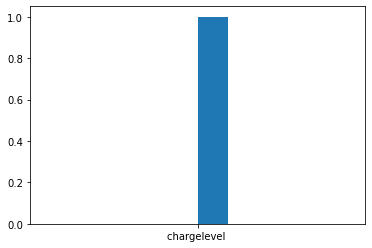

In [14]:
plt.hist('chargelevel ', bins = 10, data = july_pkl);

<AxesSubplot:>

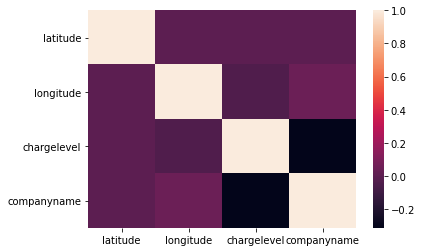

In [16]:
corr = july_pkl.corr()
sns.heatmap(corr)

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15), sharex=True, sharey=True,
                        tight_layout=True)

# We can increase the number of bins on each axis
axs[0].hist2d(july_pkl, july_scooters, bins=40)

# As well as define normalization of the colors
axs[1].hist2d(x, y, bins=40, norm=colors.LogNorm())

# We can also define custom numbers of bins for each axis
axs[2].hist2d(x, y, bins=(80, 10), norm=colors.LogNorm())

plt.show()